In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./brute_force_2try_4ban_100runs.csv")

In [3]:
data.head(1)

,Strategy,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,...,Run 92,Run 93,Run 94,Run 95,Run 96,Run 97,Run 98,Run 99,Run 100,Run 101
0,Ban Rules: \tTry Rules: \tFallback: Left->Righ...,1212,1120,372,128,236,292,1044,284,2152,...,1104,1216,236,3372,356,576,288,596,464,516


In [4]:
data['Median'] = data.median(axis=1, numeric_only=True)

In [5]:
data.head(1)

,Strategy,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,...,Run 93,Run 94,Run 95,Run 96,Run 97,Run 98,Run 99,Run 100,Run 101,Median
0,Ban Rules: \tTry Rules: \tFallback: Left->Righ...,1212,1120,372,128,236,292,1044,284,2152,...,1216,236,3372,356,576,288,596,464,516,644.0


In [6]:
data = data.sort_values(by="Median", axis=0)
data = data.reset_index(drop=True)

In [7]:
data.tail(4)

,Strategy,Run 1,Run 2,Run 3,Run 4,Run 5,Run 6,Run 7,Run 8,Run 9,...,Run 93,Run 94,Run 95,Run 96,Run 97,Run 98,Run 99,Run 100,Run 101,Median
795476,Ban Rules: ban move Left if left column locked...,11100,9228,5960,14620,14916,12820,6932,7728,15388,...,13208,7244,14812,16148,16732,9052,15752,4696,11464,10760.0
795477,Ban Rules: ban move Left if breaks monotonicit...,8524,15768,12652,1904,15672,2808,10876,8180,11888,...,11336,12860,26084,7688,17032,9160,15236,14040,8476,10876.0
795478,Ban Rules: ban move Left if left column locked...,8776,11100,16900,11096,8612,11288,2504,15820,18204,...,7452,9468,6764,14316,16896,16052,5072,12428,7532,11288.0
795479,Ban Rules: ban move Left if left column locked...,8408,16856,13564,16296,9940,8324,6064,16456,14024,...,11464,9868,15144,8760,7520,6992,7172,17396,16664,11464.0


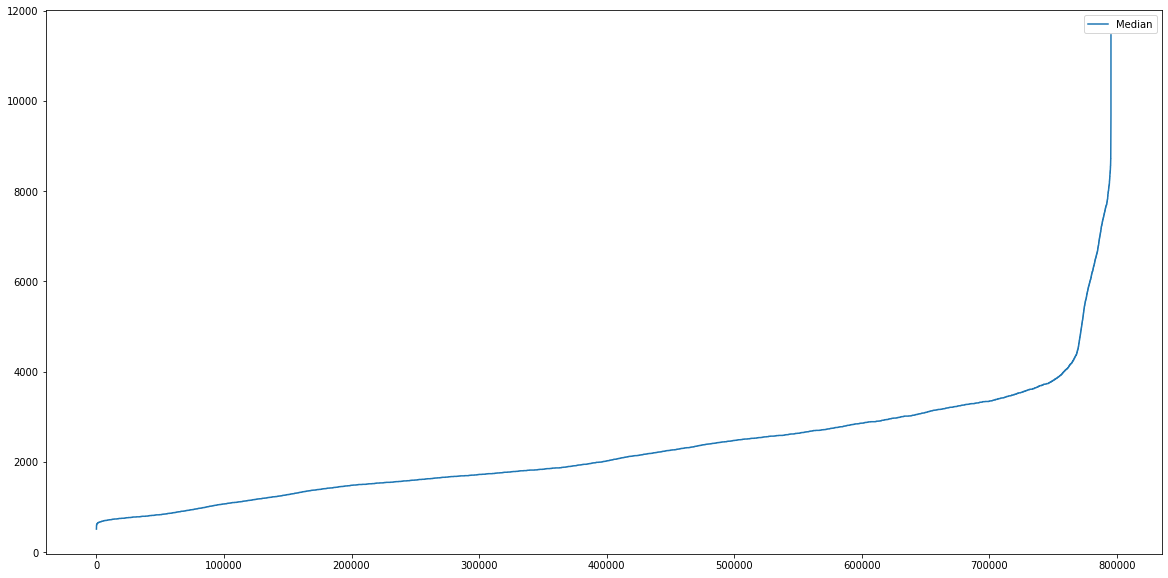

In [8]:
# start at highest medians
# x axis logarithmic (start indexing at 1)
data.plot(y="Median", figsize=(20,10))
plt.show()

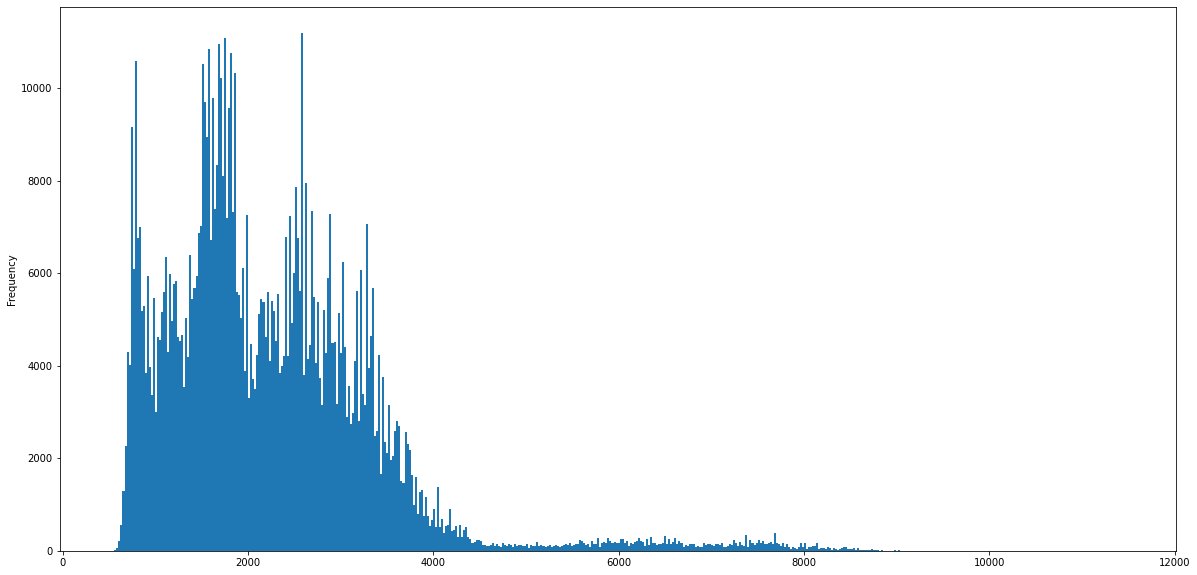

In [9]:
data['Median'].plot.hist(figsize=(20, 10), bins=500)
plt.show()